# Correlation and Regression

Complete this problem set with your group (up to 4 students). You can either hand-write your work and submit a hard copy, or go to File -> Download as HTML to generate an HTML file, then either submit it online or as a hard copy. Each group only needs to submit one copy and will receive the same grade. 

This team homework is based on Lecture 29: Correlation, Lecture 30: Regression and Lecture 31: Least Squares. 

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
- [Correlation](https://inferentialthinking.com/chapters/15/1/Correlation.html)
- [Regression Line](https://inferentialthinking.com/chapters/15/2/Regression_Line.html)
- [Least Squares](https://inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

In [3]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from math import ceil

### Scatterplots

Consider the car data given in the file. An explanation of some of the varibles:

	Weight	= Weight of the car (in pounds)
	CityMPG = EPA's estimated miles per gallon for city driving
	FuelCap	= Size of the gas tank (in gallons)
	QtrMile	= Time (in seconds) to go 1/4 mile from a standing start
	Acc060	= Time (in seconds) to accelerate from zero to 60 mph
	PageNum	= Page number on which the car appears in the buying guide


Use `cars.scatter` to find pairs of variables that show

1. a strong positive association
2. a strong negative association
3. a strong negative association
4. a weak negative association
5. almost no association 

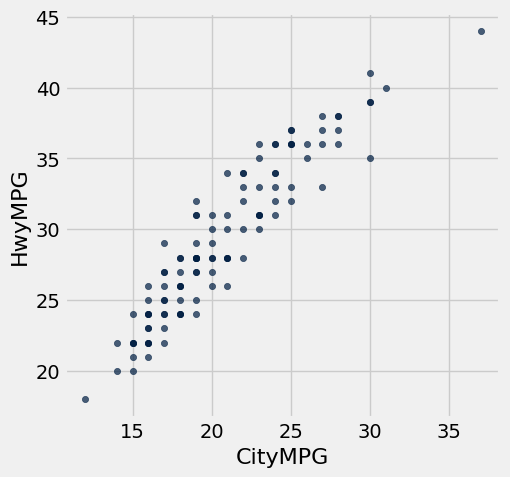

In [4]:
cars = Table().read_table('Cars2015.csv')
cars.scatter('CityMPG', 'HwyMPG') # example of a strong positive correlation

### Correlation 

The following code was taken from the textbook [15.1: Correlation](https://inferentialthinking.com/chapters/15/1/Correlation.html). It calculates the r value for each pair of variables by first converting the X and Y values to standard units. Using mathematical notation this means: 

$r = \frac{\sum Z_x \cdot Z_y}{n}$

In [5]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, xlabel, ylabel):
    return np.mean(standard_units(t.column(xlabel))*standard_units(t.column(ylabel)))


In [6]:
correlation(cars, 'CityMPG', 'HwyMPG')

0.93406435294851331

Use `correlation` function to compute $r$ for each pair of variables you listed above. Using the numbering (1-5) above, list these five pairs in ascending order. 

### Regression 

Based on the `correlation` function described above, the following code computes the slope and intercept of the regression line. 

In [7]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

Based on the slope and intercept, the following code plots the regression line with the scatter plot. 

In [9]:
def scatter_with_regression_line(table, xlabel, ylabel):
    m = slope(table, xlabel, ylabel) 
    b = intercept(table, xlabel, ylabel)
    table.scatter(xlabel, ylabel)
    xmin = np.min(table.column(xlabel))
    xmax = np.max(table.column(xlabel))
    xlimits = np.array([xmin, xmax])
    plots.plot(xlimits, m*xlimits + b)


Use the code provided above to compute the regression line that predicts the CityMPG (Y) from the Weight (X) of the vehicle. 

Identify two cars from the scatter plot that appear to have the largest prediction errors (also called the *residual*) in absolute value. What are their make and model? You may want to review `Table.where` and the predicates in the [Python Reference](https://www.data8.org/sp22/python-reference.html) 

Using the Weight of the vehicle as the X-coordinate, and residual as the Y-coordinate, create the so-called ```residual plot``` for the same problem of predicting City MPG from Weight of the vehicle. Where are the two cars that you found above in the residual plot? 

### Model Fitting by using `minimize`

The following code demonstrates how to use the `minimize` function to fit models to a set of data. It accepts a loss function as input, and outputs the parameters that result in the minimum loss for the function. For example, in the code shown below, `linear_fit` computes the loss of a linear function $y=mx+b$ fitted to the set of 5 points. Passing it as input to `minimize` returns the two parameters $m$ and $b$ necessary to specify the linear function. 

In [10]:
five_points = Table().with_columns('x', [1,2,3,4,5], 'y',[1, 1, 3, 2, 6])

In [23]:
def linear_fit(m, b):
    errors = five_points.column('y') - (m*five_points.column('x') + b)
    return np.sum((errors)**2)

m, b = minimize(linear_fit)
m, b

(1.1037943711302989, -0.7554848944584851)

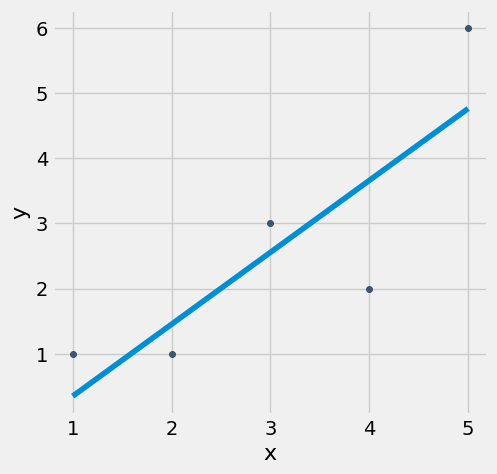

In [21]:
five_points.scatter('x', 'y')
xlimits = np.array([1, 5])
plots.plot(xlimits, m*xlimits + b)

Change the code so that the loss function calculates the square root of the sum of errors. Did this change the fitted model in any way? 

Change the code again so that the loss function calculates the sum of absolute values of errors. Did this change the model? 

A quadratic model uses 3 parameters to fit the data: $y = ax^2 + bx + c$. Run the following code and evaluate the residual of the model returned by `minimize`. How does this residual compare with the least squares linear model? 

(0.35714285912175547, -1.0428571552466637, 1.8000000234091262)

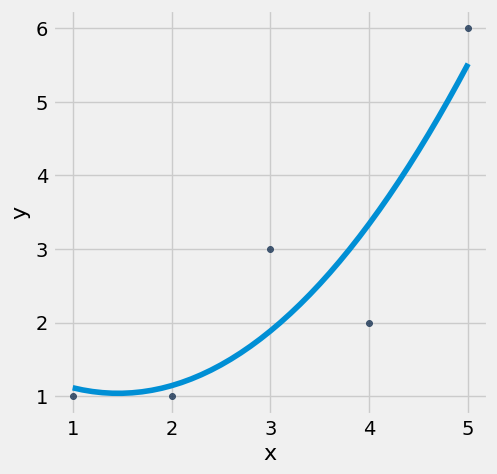

In [12]:
def quadratic_fit(a, b, c):
    x = five_points.column('x')
    errors = five_points.column('y') - (a*(x**2) + b*x + c)
    return np.sum(errors**2)

a, b, c = minimize(quadratic_fit)
five_points.scatter('x', 'y')
xlimits = np.arange(1, 5.1, 0.1)
plots.plot(xlimits, a*xlimits**2 + b*xlimits + c)
a, b, c

Modify the code so that it fits a cubic model which uses 4 parameters: $ y = ax^3 + bx^2 + cx + d$. How does the residual of the cubic model compare with the quadratic one? 

In [24]:
def cubic_fit(a, b, c, d):
    ...

In mathematics, quadratic and cubic models are members of the general polynomial family. What happens to the residual of the best fit model if you keep increasing the number of parameters? Show this through an experiment. Is this a good idea? 